In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1727, 191
train = pd.read_csv('/Users/bdlab/Desktop/sparse-matrix-multiplication/scenario-extraction/d-optimal/d-optimal-of-spmm/train-test-csv/1727-nonsquare-train-from-1918-nonsquare-spmm-over-3s.csv')
test = pd.read_csv('/Users/bdlab/Desktop/sparse-matrix-multiplication/scenario-extraction/d-optimal/d-optimal-of-spmm/train-test-csv/191-nonsquare-test-from-1918-nonsquare-spmm-over-3s.csv')

In [2]:
# 일부 feature -> MAPE 9

# Train + Valid
X_train = train[['lr','lc','rc','ld','rd','lnnz','rnnz','lr*lc','lc*rc','lr*rc','lr*lc*rc','ld*rd','lr*rc*ld*rd','lr*lc*rc*ld*rd','lnnz*rnnz']] 
y_train = train['bz_smsm']

# Test
X_test = test[['lr','lc','rc','ld','rd','lnnz','rnnz','lr*lc','lc*rc','lr*rc','lr*lc*rc','ld*rd','lr*rc*ld*rd','lr*lc*rc*ld*rd','lnnz*rnnz']] 
y_test = test['bz_smsm']

In [4]:
from sklearn.metrics import r2_score

def mean_absolute_percentage_error(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

In [5]:
from scipy.optimize import nnls

# NNLS(Non-Negative Least Squares)회귀모델 정의 및 훈련데이터로 학습
# (모든 가중치가 0 또는 양수값을 가진다.)
nnls_coef, nnls_intercept =nnls(X_train.to_numpy(), y_train.to_numpy(), maxiter=1000)


[1.61431379e-03 0.00000000e+00 0.00000000e+00 3.43040664e-03
 1.22149347e-03 0.00000000e+00 0.00000000e+00 2.03721158e-05
 6.05874409e-11 0.00000000e+00 7.86831244e-02]
2690168.943210229


In [6]:
# NNLS를 통해 나온 각 weight 추출
C1=np.array(pd.DataFrame(nnls_coef).iloc[0])
C2=np.array(pd.DataFrame(nnls_coef).iloc[1])
C3=np.array(pd.DataFrame(nnls_coef).iloc[2])
C4=np.array(pd.DataFrame(nnls_coef).iloc[3])
C5=np.array(pd.DataFrame(nnls_coef).iloc[4])
C6=np.array(pd.DataFrame(nnls_coef).iloc[5])
C7=np.array(pd.DataFrame(nnls_coef).iloc[6])
C8=np.array(pd.DataFrame(nnls_coef).iloc[7])
C9=np.array(pd.DataFrame(nnls_coef).iloc[8])
C10=np.array(pd.DataFrame(nnls_coef).iloc[9])
C11=np.array(pd.DataFrame(nnls_coef).iloc[10])
C12=np.array(pd.DataFrame(nnls_coef).iloc[11])
C13=np.array(pd.DataFrame(nnls_coef).iloc[12])
C14=np.array(pd.DataFrame(nnls_coef).iloc[13])
C15=np.array(pd.DataFrame(nnls_coef).iloc[14])

# 테스트 데이터 예측값 도출
y_pred = C1*X_test['lr']+C2*X_test['lc']+C3*X_test['rc']+C4*X_test['ld']+C5*X_test['rd']+C6*X_test['lnnz']+C7*X_test['rnnz']+C8*X_test['lr*lc']+C9*X_test['lc*rc']+C10*X_test['lr*rc']+C11*X_test['lr*lc*rc']+C12*X_test['ld*rd']+C13*X_test['lr*rc*ld*rd']+C14*X_test['lr*lc*rc*ld*rd']+C15*X_test['lnnz*rnnz']

In [8]:
# nnls metric
print("\nMAPE : ", mean_absolute_percentage_error(y_test,y_pred))
print("R^2 : ", r2_score(y_test, y_pred))


MAPE :  233.161168728383
R^2 :  0.6839923594448862


In [9]:
mape_list = {}
# 예측값, 실제값을 확인하며 mape 계산 후 mape_list에 삽입 
for idx,value in enumerate(y_test):
    mape_temp = {}
    predicate = int(y_pred[idx])
    mape = abs((value - predicate) / value) * 100
    mape_temp['pred'] = predicate
    mape_temp['real'] = value
    mape_temp['mape'] = mape
    mape_list[idx] = mape_temp
mape_list_sort = sorted(mape_list.values(), key=lambda x:(x['mape']), reverse=True)
mape_list_sort  

[{'pred': 98988, 'real': 3095, 'mape': 3098.319870759289},
 {'pred': 77633, 'real': 3236, 'mape': 2299.0420271940666},
 {'pred': 85805, 'real': 3922, 'mape': 2087.7868434472207},
 {'pred': 60548, 'real': 3014, 'mape': 1908.8918380889183},
 {'pred': 68165, 'real': 3470, 'mape': 1864.4092219020174},
 {'pred': 72716, 'real': 4176, 'mape': 1641.2835249042146},
 {'pred': 84147, 'real': 4839, 'mape': 1638.9336639801613},
 {'pred': 124799, 'real': 9288, 'mape': 1243.658484065461},
 {'pred': 73795, 'real': 5719, 'mape': 1190.3479629305823},
 {'pred': 59067, 'real': 4584, 'mape': 1188.5471204188482},
 {'pred': 59730, 'real': 5127, 'mape': 1065.0087770626096},
 {'pred': 40576, 'real': 3650, 'mape': 1011.6712328767123},
 {'pred': 49416, 'real': 4822, 'mape': 924.8029863127334},
 {'pred': 55021, 'real': 5460, 'mape': 907.7106227106228},
 {'pred': 38820, 'real': 4411, 'mape': 780.0725459079573},
 {'pred': 32051, 'real': 3651, 'mape': 777.869076965215},
 {'pred': 33854, 'real': 4131, 'mape': 719.511

In [10]:
# 모델의 weight(가중치)와 bias(절편) 출력
print(nnls_coef)
print(nnls_intercept)

[1.61431379e-03 0.00000000e+00 0.00000000e+00 3.43040664e-03
 1.22149347e-03 0.00000000e+00 0.00000000e+00 2.03721158e-05
 6.05874409e-11 0.00000000e+00 7.86831244e-02]
2690168.943210229


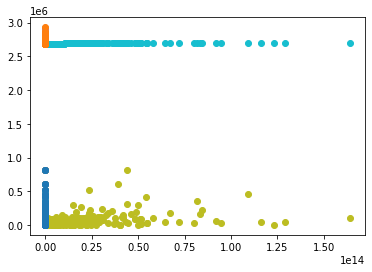

In [19]:
# 산점도 그리기
plt.plot(X_test, y_test, 'o')

# 직선 그리기 
plt.plot(X_test, nnls_coef*X_test + nnls_intercept, 'o')